In [165]:
# For inline graphs
%matplotlib inline

## Imports

# pandas, numpy
import pandas as pan
import numpy as np

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# Matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Missingno
import missingno as mno

In [166]:
# Load the different files
df_marketing = pan.DataFrame(pan.read_csv('../input/Marketing.csv', encoding="ISO-8859-1"))
#df_immatriculations = pan.DataFrame(pan.read_csv('../input/Immatriculations.csv', encoding="ISO-8859-1"))
df_clients = pan.DataFrame(pan.read_csv('../input/Clients_0.csv', encoding="ISO-8859-1"))
#df_catalogue = pan.DataFrame(pan.read_csv('../input/Catalogue.csv', encoding="ISO-8859-1"))

df_clients.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
2eme voiture          object
immatriculation       object
dtype: object

In [167]:
df_clients.shape

(100000, 7)

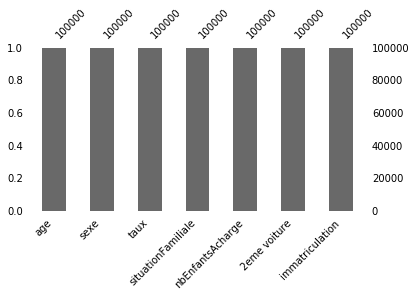

In [168]:
## Check missing data for each DF
##mno.bar(df=df_marketing, figsize=(6, 3), fontsize=10)
mno.bar(df=df_clients, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_catalogue, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_immatriculations, figsize=(6, 3), fontsize=10)

# See no NaN data in the 4 datasets, nice BUT there is : '?', 'N/D', ' ' hard written in it

In [169]:
df_clients['sexe'] = df_clients['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_clients['sexe'] = df_clients['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_clients['sexe'] = df_clients['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeClients = pan.get_dummies(df_clients['sexe'])
df_clients = pan.concat([df_clients, dfSexeClients], axis=1).drop(['sexe'] , axis=1)

df_clients.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme
0,44,476,En Couple,0,false,3176 TS 67,0,1
1,20,422,En Couple,2,false,3721 QS 49,0,1
2,49,221,Célibataire,0,false,9099 UV 26,1,0
3,57,246,Célibataire,0,false,3563 LA 55,0,1
4,58,1149,Célibataire,0,false,6963 AX 34,0,1


In [170]:
df_clients['situationFamiliale'] = df_clients['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeClients = pan.get_dummies(df_clients['situationFamiliale'])
df_clients = pan.concat([df_clients, dfSituationFamillialeClients], axis=1).drop(['situationFamiliale'] , axis=1)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,false,3176 TS 67,0,1,0,1,0
1,20,422,2,false,3721 QS 49,0,1,0,1,0
2,49,221,0,false,9099 UV 26,1,0,1,0,0
3,57,246,0,false,3563 LA 55,0,1,1,0,0
4,58,1149,0,false,6963 AX 34,0,1,1,0,0


In [171]:
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['true'], 1)
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['false', ' ', '?'], 0)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [172]:
#df_clients['immatriculation_num'] = df_clients['immatriculation'].apply(lambda x : x.split(' ')[2]).astype(np.int64)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [173]:
df_clients['nbEnfantsAcharge'] = df_clients['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [174]:
# Little function to check if there something else than ints in the object types as ' ' or '?' etc
def checkIfInt(s):
    try: 
        int(s)
        return 
    except ValueError:
        print(s)
        return 

In [175]:
dfTauxClients = df_clients[((df_clients.taux != ' ') & (df_clients.taux != '?') & (df_clients.taux != '-1'))]
meanTauxClients = dfTauxClients.taux.astype(np.float64).mean()

df_clients['taux'] = df_clients['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_clients['taux'] = df_clients['taux'].astype(np.float64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


In [176]:
dfAgeClients = df_clients[((df_clients.age != ' ') & (df_clients.age != '?') & (df_clients.age != '-1'))]
meanAgeClients = dfAgeClients.age.astype(np.int64).mean()

df_clients['age'] = df_clients['age'].replace([' ', '?', '-1'], meanAgeClients)
df_clients['age'] = df_clients['age'].astype(np.int64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


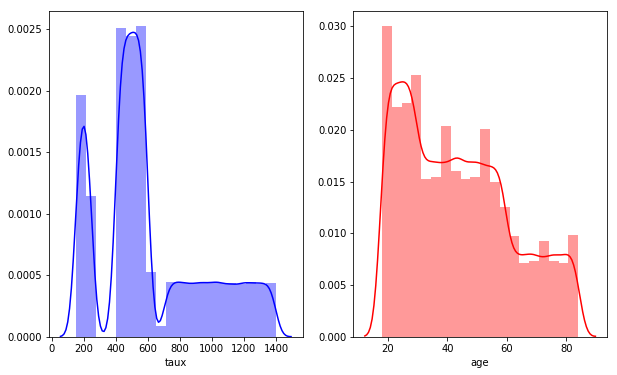

In [177]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_clients['taux'],bins=20,ax=ax1,color='b')
sns.distplot(df_clients['age'],bins=20,ax=ax2,color='r')
plt.show()

In [178]:
df_imma_copy = df_clients['immatriculation'].copy()
df_clients = df_clients.drop(['immatriculation'] , axis=1)
df_clients.head(5)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [179]:
df_clients.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,43.710880,609.807481,1.25189,0.130750,0.297490,0.699420,0.353500,0.63994,0.006560
std,18.216331,334.599826,1.39054,0.337128,0.457156,0.458513,0.478059,0.48002,0.080728
min,18.000000,150.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,28.000000,422.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,42.000000,523.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000
75%,56.000000,826.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,84.000000,1399.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C98494B828>], dtype=object)

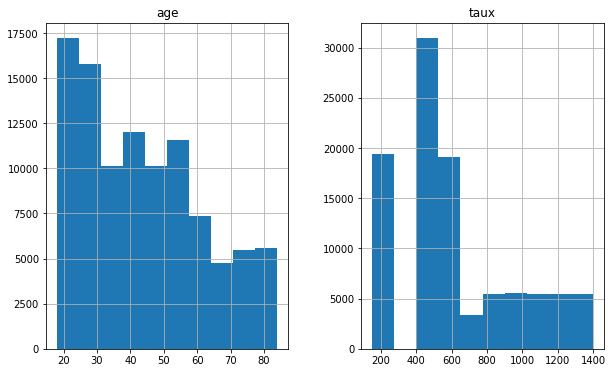

In [180]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()

df_clients.hist(column="age", ax=ax1)
df_clients.hist(column="taux", ax=ax2)

In [181]:
#df_clients['age'] = pan.qcut(df_clients['age'],5,labels=[0,1,2,3,4]).astype(int)
#df_clients['taux'] = pan.qcut(df_clients['taux'],5,labels=[0,1,2,3,4]).astype(int)

print(df_clients['age'].value_counts())
print(df_clients['taux'].value_counts())

29    2527
19    2525
20    2497
28    2488
26    2487
27    2483
24    2481
25    2475
21    2447
18    2433
23    2424
22    2409
43    1978
59    1767
35    1754
49    1722
40    1714
39    1708
45    1699
50    1699
36    1689
47    1684
33    1683
52    1679
51    1675
32    1674
31    1673
56    1672
38    1671
48    1670
      ... 
54    1634
41    1628
53    1628
58    1618
57    1612
76     866
81     837
80     828
61     827
69     822
68     818
82     818
64     807
66     802
62     802
83     801
73     798
84     797
67     796
70     786
77     784
63     779
74     772
75     763
79     760
71     759
78     753
60     752
65     751
72     731
Name: age, Length: 67, dtype: int64
544.0     295
448.0     284
555.0     282
402.0     282
509.0     279
521.0     278
497.0     277
501.0     277
576.0     275
586.0     275
453.0     273
439.0     272
546.0     272
424.0     271
590.0     271
455.0     271
577.0     271
423.0     270
572.0     270
594.0     269
409.0     269

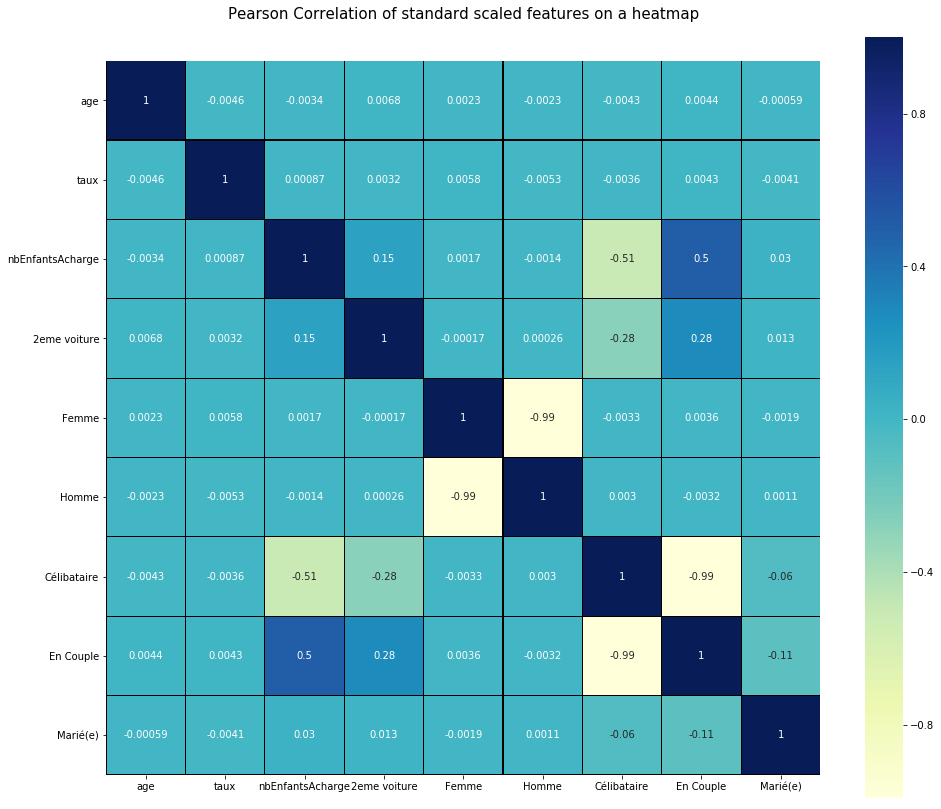

In [182]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(16, 14))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df_clients.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='black', annot=True, cmap="YlGnBu")

In [183]:
df_clients.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [184]:
df_clients = pan.concat([df_clients, df_imma_copy], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation
0,44,476.0,0,0,0,1,0,1,0,3176 TS 67
1,20,422.0,2,0,0,1,0,1,0,3721 QS 49
2,49,221.0,0,0,1,0,1,0,0,9099 UV 26
3,57,246.0,0,0,0,1,1,0,0,3563 LA 55
4,58,1149.0,0,0,0,1,1,0,0,6963 AX 34


In [185]:
df_imma_cluster = pan.DataFrame(pan.read_csv('../input/immatriculation_and_cluster.csv', encoding="ISO-8859-1"))
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,3
1,3721 QS 49,2
2,9099 UV 26,3
3,3563 LA 55,1
4,6963 AX 34,1


In [186]:
# ajout du cluster de leur véhicule
df_clients = df_clients.merge(df_imma_cluster, left_on="immatriculation", right_on="immatriculation", how="inner")
df_clients = df_clients.drop(['immatriculation'], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster_predicted
0,44,476.0,0,0,0,1,0,1,0,3
1,20,422.0,2,0,0,1,0,1,0,2
2,49,221.0,0,0,1,0,1,0,0,3
3,57,246.0,0,0,0,1,1,0,0,1
4,58,1149.0,0,0,0,1,1,0,0,1


In [187]:
df_marketing['sexe'] = df_marketing['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeMarketing = pan.get_dummies(df_marketing['sexe'])
df_marketing = pan.concat([df_marketing, dfSexeMarketing], axis=1).drop(['sexe'] , axis=1)

df_marketing['situationFamiliale'] = df_marketing['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeMarketing = pan.get_dummies(df_marketing['situationFamiliale'])
df_marketing = pan.concat([df_marketing, dfSituationFamillialeMarketing], axis=1).drop(['situationFamiliale'] , axis=1)

df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['true'], 1).astype(np.int64)
df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['false', ' ', '?'], 0).astype(np.int64)

df_marketing['nbEnfantsAcharge'] = df_marketing['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_marketing['taux'] = df_marketing['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_marketing['taux'] = df_marketing['taux'].astype(np.float64)

df_marketing['age'] = df_marketing['age'].replace([' ', '?', '-1'], meanAgeClients)
df_marketing['age'] = df_marketing['age'].astype(np.int64)

df_marketing['Marié(e)'] = 0
df_marketing['Marié(e)'] = df_marketing['Marié(e)'].astype(np.uint8)

df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,21,1396.0,0,0,1,0,1,0,0
1,35,223.0,0,0,0,1,1,0,0
2,48,401.0,0,0,0,1,1,0,0
3,26,420.0,3,1,1,0,0,1,0
4,80,530.0,3,0,0,1,0,1,0


In [188]:
df_marketing.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object